# Opioid Model UsingTau Leaping
***
Model based off the prescription opioid crisis in the United States. Based off a paper from the University of Tennessee
https://0afa17f2-bd49-4985-b62b-358fb4a6bf3f.filesusr.com/ugd/f70b03_22c7703e4a3b4da6b9555c738ed8566d.pdf
***
## Setup the Environment
***

In [1]:
import os
import sys
sys.path.insert(1, os.path.abspath(os.path.join(os.getcwd(), '../../..')))

In [2]:
import gillespy2

***
## Create the Opioid Model
***

In [3]:
def create_opioid(parameter_values=None):
    # Initialize Model
    model = gillespy2.Model(name="Opioid")

    # Define Variables (GillesPy2.Species)
    S = gillespy2.Species(name='Susceptibles', initial_value=1000)
    P = gillespy2.Species(name='Prescribed_Users', initial_value=0)
    A = gillespy2.Species(name='Addicted', initial_value=0)
    R = gillespy2.Species(name='Rehab', initial_value=0)
    Natural_Deaths = gillespy2.Species(name='Natural_Deaths', initial_value=0)
    Addiction_Deaths = gillespy2.Species(name='Addiction_Deaths', initial_value=0)
    
    # Add Variables to Model
    model.add_species([S,P,A,R,Natural_Deaths,Addiction_Deaths])

    # Define Parameters
    alpha = gillespy2.Parameter(name='alpha', expression= 0.15)
    epsilon = gillespy2.Parameter(name='epsilon', expression= 0.8)
    beta_p = gillespy2.Parameter(name='beta_p', expression= 0.00266)
    beta_a = gillespy2.Parameter(name='beta_a', expression= 0.00094)
    gamma = gillespy2.Parameter(name='gamma', expression= 0.00744)
    zeta = gillespy2.Parameter(name='zeta', expression= 0.2)
    delta = gillespy2.Parameter(name='delta', expression= 0.1)
    sigma = gillespy2.Parameter(name='sigma', expression= 0.9)
    mu = gillespy2.Parameter(name='mu', expression= 0.00729)
    mu_prime = gillespy2.Parameter(name='mu_prime', expression= 0.01159)

    # Add Parameters to Model
    model.add_parameter([alpha, epsilon, beta_p, beta_a, gamma, zeta, delta, sigma, mu, mu_prime])

    # Define Reactions
    SP = gillespy2.Reaction(
        name="SP", reactants={'Susceptibles': 1}, products={'Prescribed_Users': 1}, rate='alpha'
    )
    SA_a = gillespy2.Reaction(name="SA_a", reactants={'Susceptibles': 1}, products={'Addicted': 1}, rate='beta_a')
    SA_p = gillespy2.Reaction(name="SA_p", reactants={'Susceptibles': 1}, products={'Addicted': 1}, rate='beta_p')
    mu_S = gillespy2.Reaction(
        name="mu_S", reactants={'Susceptibles': 1}, products={'Susceptibles': 1, 'Natural_Deaths': 1}, rate='mu'
    )
    PA = gillespy2.Reaction(name="PA", reactants={'Prescribed_Users': 1}, products={'Addicted': 1}, rate='gamma')
    PS = gillespy2.Reaction(
        name="PS", reactants={'Prescribed_Users': 1}, products={'Susceptibles': 1}, rate='epsilon'
    )
    AR = gillespy2.Reaction(name="AR", reactants={'Addicted': 1}, products={'Rehab': 1}, rate='zeta')
    RA = gillespy2.Reaction(name="RA", reactants={'Rehab': 1}, products={'Addicted': 1}, rate='delta')
    RS = gillespy2.Reaction(name="RS", reactants={'Rehab': 1}, products={'Susceptibles': 1}, rate='sigma')
    mu_P = gillespy2.Reaction(
        name="mu_P", reactants={'Prescribed_Users': 1},
        products={'Susceptibles': 1, 'Natural_Deaths': 1}, rate='mu'
    )
    mu_R = gillespy2.Reaction(
        name="m_R", reactants={'Rehab': 1}, products={'Susceptibles': 1, 'Natural_Deaths': 1}, rate='mu'
    )
    mu_prime_A = gillespy2.Reaction(
        name="mu_prime_A", reactants={'Addicted': 1},
        products={'Susceptibles': 1, 'Addiction_Deaths': 1}, rate='mu_prime'
    )

    # Add Reactions to Model
    model.add_reaction([SP, PS, SA_a, SA_p, PA, AR, RA, RS, mu_P, mu_R, mu_prime_A, mu_S])
    
    # Define Timespan
    tspan = gillespy2.TimeSpan.linspace(t=200, num_points=201)
    
    # Set Model Timespan
    model.timespan(tspan)
    return model

### Instantiate the Model

In [4]:
model = create_opioid()

***
## Run the Simulations
***
Run the model by calling the run function on the model and select solver via `algorithm` keyword argument.

In [5]:
%time results = model.run(algorithm="Tau-Leaping")

CPU times: user 31.7 ms, sys: 56.6 ms, total: 88.2 ms
Wall time: 3.05 s


***
## Visualizations
***

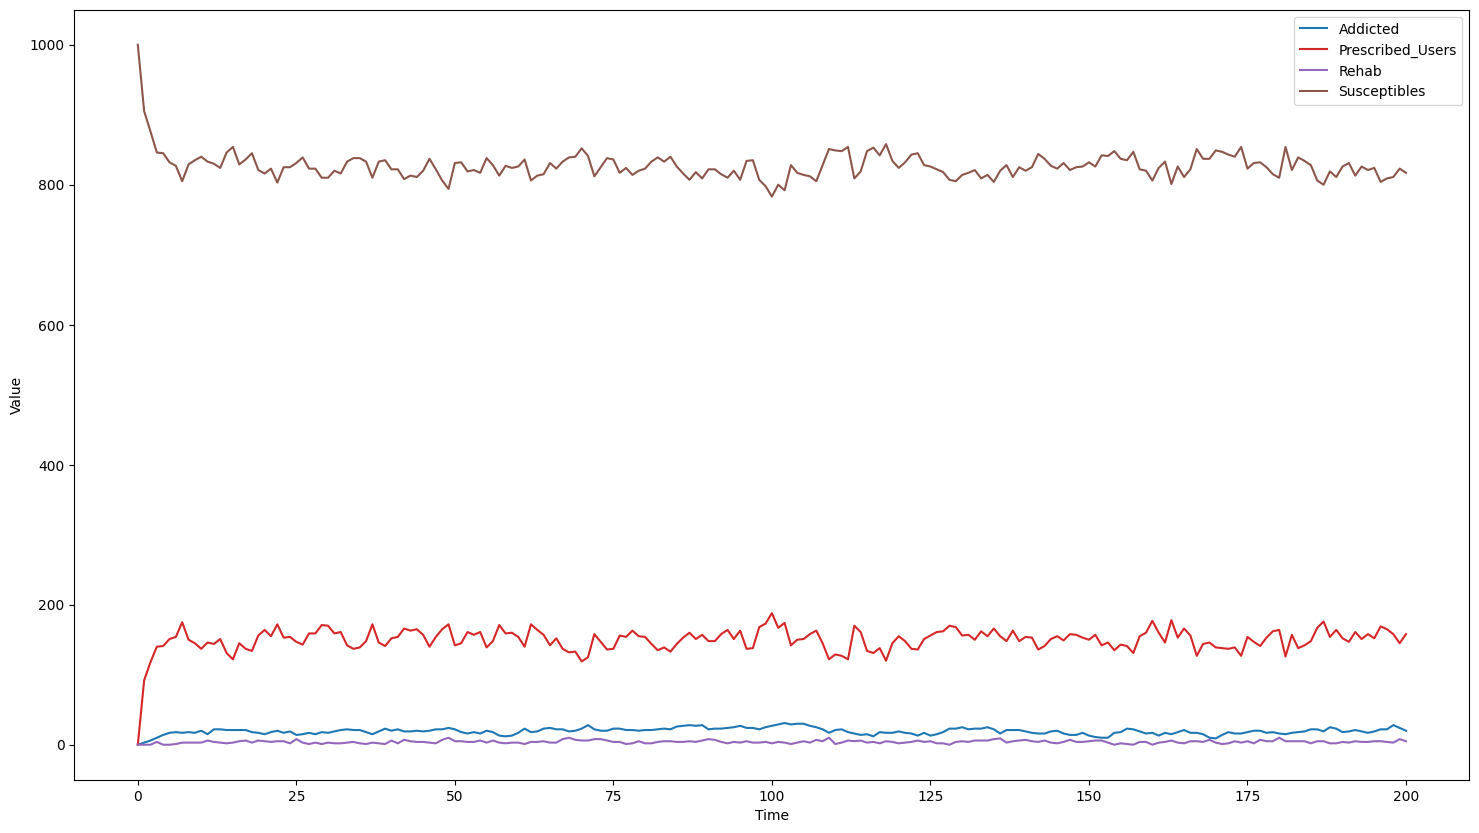

In [6]:
results.plot(included_species_list=['Susceptibles','Prescribed_Users','Addicted','Rehab'])

In [7]:
results.plotplotly()